[Reference](https://medium.com/@varunsrivatsa27/data-analysis-with-python-model-development-part-3-d75df5480ab3)

# Setup — Import Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path of data
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Linear Regression and Multiple Linear Regression


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()
lm

LinearRegression()

In [5]:
X = df[["highway-mpg"]]
Y = df[["price"]]

In [6]:
lm.fit(X,Y)

LinearRegression()

In [7]:
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [8]:
lm.intercept_

array([38423.30585816])

In [9]:
lm.coef_

array([[-821.73337832]])

# Multiple Linear Regression


In [10]:
Z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]

In [11]:
lm.fit(Z, df["price"])

LinearRegression()

In [12]:
lm.intercept_

-15806.62462632922

In [13]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [14]:
lm2 = LinearRegression()
lm2.fit(df[["normalized-losses", "highway-mpg"]], df["price"])

LinearRegression()

In [15]:
lm2.intercept_

38201.31327245728

In [16]:
lm2.coef_

array([   1.49789586, -820.45434016])

# Model Evaluation Using Visualization


In [17]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

(0.0, 48153.361773906894)

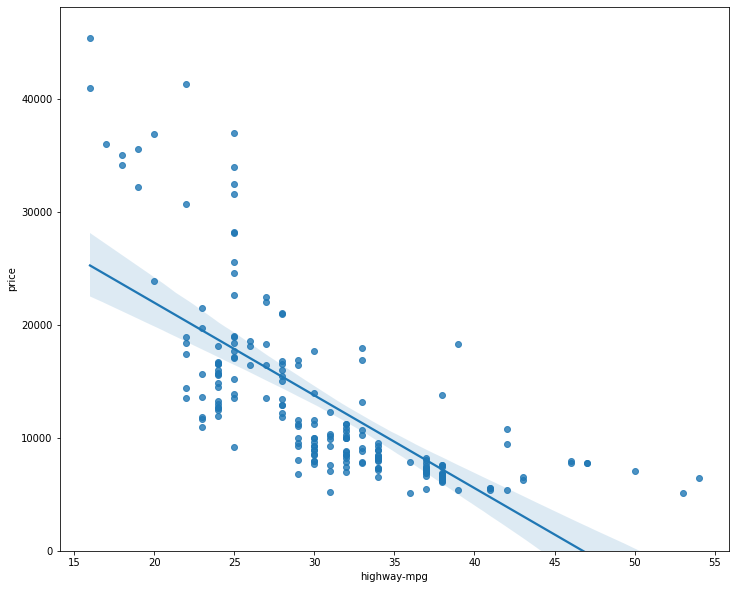

In [18]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

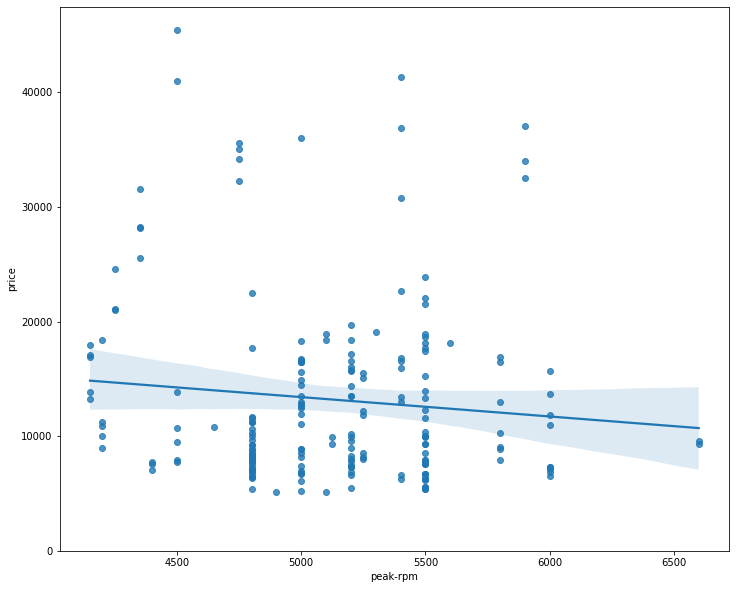

In [19]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [20]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


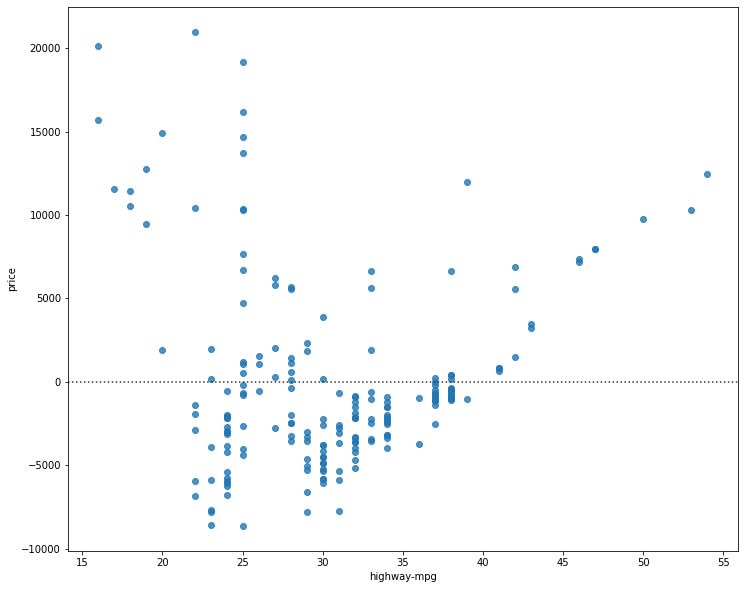

In [21]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df["highway-mpg"], df["price"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


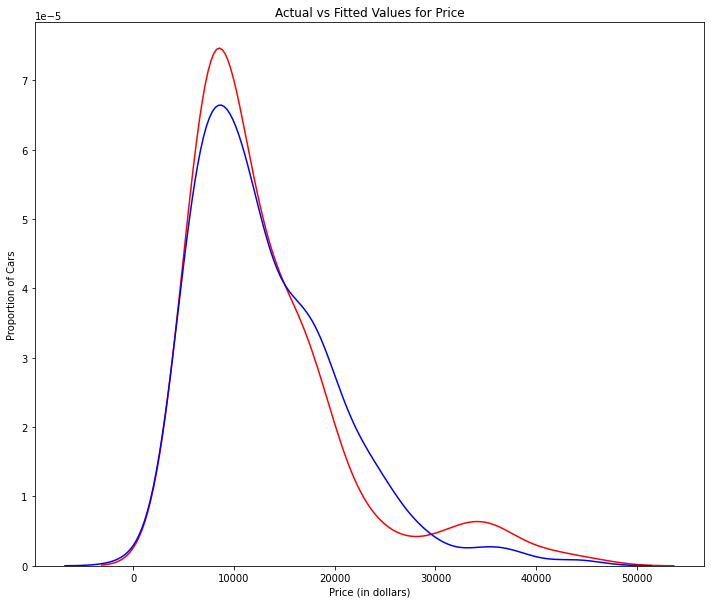

In [22]:
Y_hat = lm.predict(Z)
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df["price"], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values",ax=ax1)
plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")
plt.show()
plt.close()

# Polynomial Regression and Pipelines.


In [23]:
# Define a function PlotPolly 
def PlotPolly(model, independent_variable, dependent_variable, Name):
   x_new = np.linspace(15, 55, 100)
   y_new = model(x_new)
   plt.plot(independent_variable, dependent_variable, ".", x_new, y_new, "-")
   plt.title("Polynomial Fit with Matplotlib for Price ~ Length")
   ax = plt.gca()
   ax.set_facecolor((0.898, 0.898, 0.898))
   fig = plt.gcf()
   plt.xlabel(Name)
   plt.ylabel("Price of Cars")
   plt.show()
   plt.close()

In [24]:
x = df["highway-mpg"]
y= df["price"]

In [25]:
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


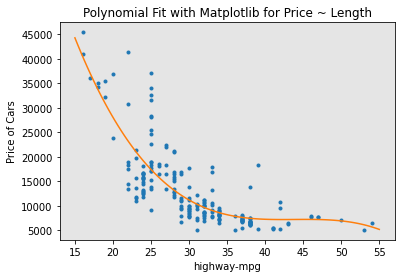

In [26]:
PlotPolly(p, x, y, "highway-mpg")

In [27]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


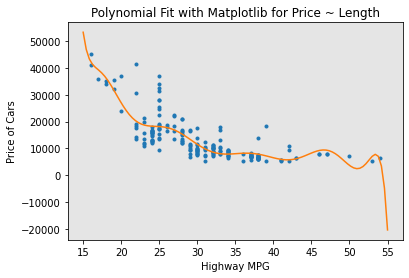

In [28]:
# Here we use a polynomial of the 11rd order (cubic)
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, "Highway MPG")

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [31]:
Z_pr=pr.fit_transform(X)

In [32]:
Z.shape

(201, 4)

In [33]:
Z_pr.shape

(201, 3)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
Input=[("scale", StandardScaler()),("polynomial", PolynomialFeatures(include_bias=False)), ("model", LinearRegression())]

In [36]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [37]:
z = Z.astype(float)
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [38]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

# Measures for In-Sample Evaluation


In [39]:
#highwa_mpg_fit
lm.fit(X, Y)
# Find the R^2
print("The R-square is: ", lm.score(X, Y))

The R-square is:  0.4965911884339176


In [40]:
Yhat = lm.predict(X)
print("The out of the first four predicted value is: ", Yhat[0:4])

The out of the first four predicted value is:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [41]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df["price"], Yhat)
print("The mean square of price and predicted value is: ", mse)

The mean square of price and predicted value is:  31635042.944639888


In [42]:
# Fit the model
lm.fit(Z,df["price"])
# Find the R^2
print("The R-square is: ", lm.score(Z, df["price"]))

The R-square is:  0.8093562806577457


In [43]:
Y_predict_multifit = lm.predict(Z)

In [44]:
print("The mean square error of price and predicted value using multifit is: ", mean_squared_error(df["price"], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [45]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r_squared = r2_score(y, p(x))
print("The R-square value is: ", r_squared)

The R-square value is:  0.674194666390652


In [46]:
mean_squared_error(df["price"], p(x))

20474146.426361218

# Prediction and Decision Making


In [47]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [48]:
new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [49]:
lm.fit(X, Y)
lm

LinearRegression()

In [50]:
yhat= lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

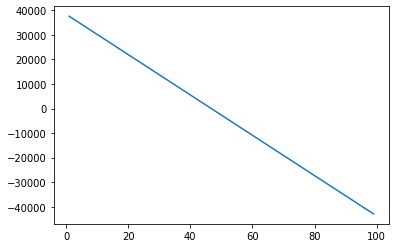

In [51]:
plt.plot(new_input, yhat)
plt.show()